<a href="https://colab.research.google.com/github/Bensemilla/techlabs_group_3_clownfishes/blob/main/timeSeriesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("charging_data.csv")

In [8]:
df[["Jahr", "Monat","Tag"]] = df["inbetriebnahmedatum"].str.split("-",expand=True)

In [10]:
df.groupby("Jahr")["anzahl_ladepunkte"].sum()

Jahr
1992        1
2001        3
2007        3
2008        2
2009      103
2010      142
2011      402
2012      360
2013      262
2014      494
2015     1027
2016     2224
2017     3677
2018     7487
2019     9499
2020    10707
2021    14817
2022    17837
2023     2216
Name: anzahl_ladepunkte, dtype: int64

In [ ]:
#Time series forecasting - is the task of predicting future values based on historical data.



In [30]:
df.groupby("betreiber")["anzahl_ladepunkte"].sum().sort_values(ascending=False).to_frame()

,anzahl_ladepunkte
betreiber,
EnBW mobility+ AG und Co.KG,4064
E.ON Drive GmbH,2789
EWE Go GmbH,1806
Mercedes-Benz AG,1621
Westenergie Metering GmbH,1514
...,...
Autohaus Müller Reudnitz GmbH,1
Genusshotel Wenisch GmbH & Co. KG,1
Geo4mation GmbH,1


from matplotlib import pyplot as plt
_df_4['anzahl_ladepunkte'].plot(kind='hist', bins=20, title='anzahl_ladepunkte')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['anzahl_ladepunkte'].plot(kind='line', figsize=(8, 4), title='anzahl_ladepunkte')
plt.gca().spines[['top', 'right']].set_visible(False)

In [21]:
df.pivot_table('anzahl_ladepunkte', ['Jahr', 'betreiber'], aggfunc='sum')

anzahl_ladepunkte
Jahr betreiber                                                            
1992 Ladestation Berglen Öschelbronn                                     1
2001 Strähle Galvanik GmbH                                               3
2007 IBH GmbH                                                            1
     Stadtwerke Ludwigslust-Grabow GmbH                                  2
2008 EGT Energie GmbH                                                    2
...                                                                    ...
2023 ratioplan GmbH                                                      3
     schutti-solar                                                       1
     smopi®                                                              4
     ubitricity Gesellschaft für verteilte Energiesy...                131
     ÜZ Mainfranken eG                                                   3

[7336 rows x 1 columns]

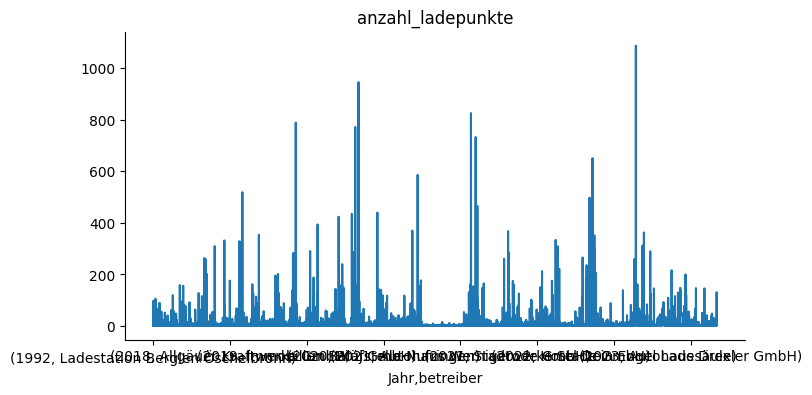

In [15]:
from matplotlib import pyplot as plt
_df_3['anzahl_ladepunkte'].plot(kind='line', figsize=(8, 4), title='anzahl_ladepunkte')
plt.gca().spines[['top', 'right']].set_visible(False)